In [2]:
from sklearn import datasets
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import model_selection

from sklearn import preprocessing


In [3]:
train = np.loadtxt('train.csv', delimiter = ',')
test = np.loadtxt('test.csv', delimiter = ',')

In [4]:
def cost(x, y ,m):
    M = len(x)
    cost = 0
    for i in range(M):
        cost+= (1/(2*M))*((y[i]-sum(m*x[i]))**2)
    return cost

def step_gradient(x , y , lr, m):
    m_slope= np.zeros(len(x[0])) 
    
    
    M = len(x)
    for i in range(M):
        X = x[i]
        Y = y[i]
        for j in range(len(X)):
            m_slope[j] += (-1/M)*(Y-sum(m*X))*X[j]

    new_m = m - (lr*m_slope)
    return new_m
    
def gd(x,y , lr , num):
    m = np.zeros(len(x[0]))
    
    for i in range(num):
        m = step_gradient(x,y, lr , m )
        print(i, "Cost: ", cost(x,y,m))
        plt.scatter(i,cost(x,y,m))
    plt.xlabel('Number of Features')
    plt.ylabel('Cost Function Value')
    plt.show()
    
    return m

In [5]:
x = test.copy()

In [6]:
def run(train,test):
    x = train[:,:-1]
    y = []
    for i in range(len(x[0])):
    
        for j in range(i,len(x[0])):
        
            y.append(x[:,i]*x[:,j] )
    y = np.array(y)
    for i in y:
        x = np.append(x, i.reshape(-1,1), axis =1) 
    
    scaler = preprocessing.StandardScaler()
    scaler.fit(x)
    x = scaler.transform(x)
    
    x = np.append(x, np.ones(len(x)).reshape(-1,1), axis = 1)
    
    y= train[:,-1]
    lr = 0.07
    
    num = 300
    m = gd(x,y,lr,num)
    
    y = []
    for i in range(len(test[0])):
        for j in range(i,len(test[0])):
            y.append(test[:,i]*test[:,j] )
    y = np.array(y)
    for i in y:
        test = np.append(test, i.reshape(-1,1), axis =1)
    
    
  
 
    
    test1 = scaler.transform(test)
    x_test = np.append(test1,np.ones(len(test1)).reshape(-1,1), axis = 1)
    
    y_pred = []
    for i in x_test:
        y_pred.append(sum(i*m))
    #for i in y_pred:
        #print(i)
    y_pred = np.array(y_pred)
    return y_pred

0 Cost:  244.96135085190366
1 Cost:  208.52410276080576
2 Cost:  179.4818931088289
3 Cost:  155.33032068440113
4 Cost:  134.85508940976305
5 Cost:  117.3348162242103
6 Cost:  102.27155835567996
7 Cost:  89.2867943032856
8 Cost:  78.07629929616652
9 Cost:  68.38792140751718
10 Cost:  60.009098648771634
11 Cost:  52.758931223803664
12 Cost:  46.482613575462416
13 Cost:  41.047227675584914
14 Cost:  36.338407123778936
15 Cost:  32.257609850896166
16 Cost:  28.71984590495543
17 Cost:  25.651762014882596
18 Cost:  22.990014804957987
19 Cost:  20.67988237659669
20 Cost:  18.674075384023595
21 Cost:  16.93171656024935
22 Cost:  15.417463344995916
23 Cost:  14.100752598658865
24 Cost:  12.955149792774801
25 Cost:  11.957787810423355
26 Cost:  11.088882737100922
27 Cost:  10.33131588672069
28 Cost:  9.670272868185002
29 Cost:  9.092931813905622
30 Cost:  8.588194007011838
31 Cost:  8.146451093207355
32 Cost:  7.759383873626653
33 Cost:  7.419788368625026
34 Cost:  7.12142543721662
35 Cost:  6.8

284 Cost:  3.5778106262609994
285 Cost:  3.5758902324734776
286 Cost:  3.5739792792678164
287 Cost:  3.5720776989014795
288 Cost:  3.570185424344993
289 Cost:  3.568302389271223
290 Cost:  3.566428528044885
291 Cost:  3.564563775712283
292 Cost:  3.562708067991191
293 Cost:  3.5608613412610124
294 Cost:  3.5590235325530646
295 Cost:  3.5571945795411124
296 Cost:  3.5553744205320443
297 Cost:  3.553562994456773
298 Cost:  3.551760240861252
299 Cost:  3.5499660998977176


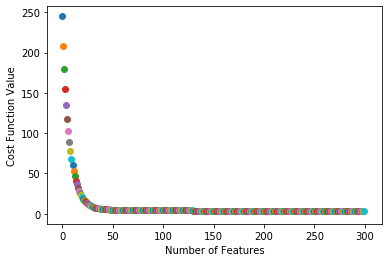

In [7]:
y_pred = run(train,test)